In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/soil-moisture-dataset/plant_vase1.CSV
/kaggle/input/soil-moisture-dataset/plant_vase1(2).CSV
/kaggle/input/soil-moisture-dataset/plant_vase2.CSV


In [6]:
data_frame = pd.read_csv("/kaggle/input/soil-moisture-dataset/plant_vase1(2).CSV")
data_frame.head(10)

,year,month,day,hour,minute,second,moisture0,moisture1,moisture2,moisture3,moisture4,irrgation
0,2020,3,6,22,16,11,0.33,0.40,0.36,0.23,0.02,False
1,2020,3,6,22,17,11,0.32,0.39,0.35,0.23,0.02,False
2,2020,3,6,22,18,11,0.31,0.39,0.34,0.22,0.02,False
3,2020,3,6,22,19,11,0.30,0.38,0.33,0.21,0.02,False
4,2020,3,6,22,20,11,0.29,0.38,0.33,0.21,0.02,False
5,2020,3,6,22,21,11,0.28,0.38,0.33,0.21,0.02,False
6,2020,3,6,22,22,12,0.28,0.37,0.33,0.20,0.02,False
7,2020,3,6,22,23,12,0.27,0.37,0.33,0.19,0.02,False
8,2020,3,6,22,24,12,0.30,0.38,0.35,0.20,0.03,False
9,2020,3,6,22,25,12,0.26,0.36,0.34,0.17,0.02,False


In [7]:
data_frame.shape

(4409, 12)

In [8]:
data_frame.isnull().sum()

year         0
month        0
day          0
hour         0
minute       0
second       0
moisture0    0
moisture1    0
moisture2    0
moisture3    0
moisture4    0
irrgation    0
dtype: int64

In [9]:
df = data_frame

In [10]:
df["year"].value_counts()

2020    4409
Name: year, dtype: int64

In [11]:
df["month"].value_counts()

3    4409
Name: month, dtype: int64

In [12]:
df["irrgation"].value_counts()

False    4409
Name: irrgation, dtype: int64

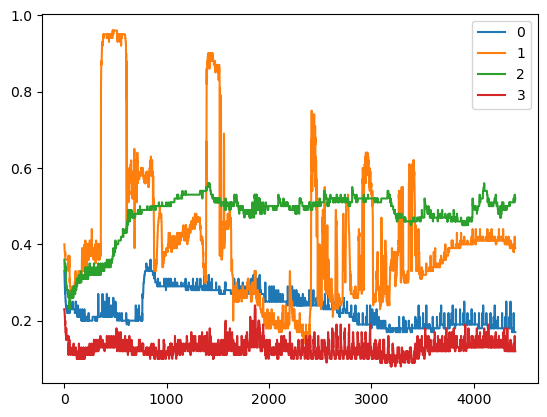

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
plt.plot(df["moisture0"])
plt.plot(df["moisture1"])
plt.plot(df["moisture2"])
plt.plot(df["moisture3"])
plt.legend(["0", "1", "2", "3"])
plt.show()

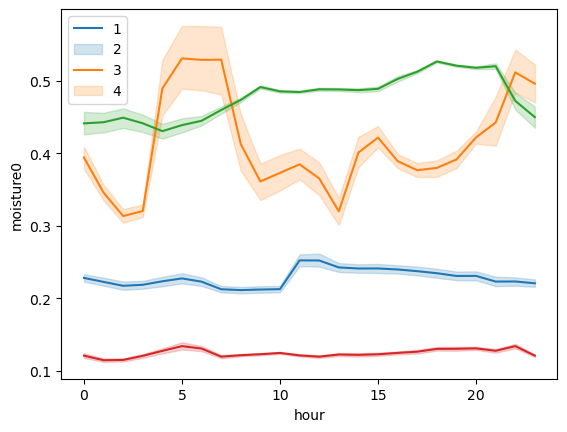

In [14]:
plt.figure()
sns.lineplot(data=df, x="hour", y="moisture0")
sns.lineplot(data=df, x="hour", y="moisture1")
sns.lineplot(data=df, x="hour", y="moisture2")
sns.lineplot(data=df, x="hour", y="moisture3")
plt.legend(["1", "2", "3", "4"])
plt.show()

In [15]:
X = df.drop("moisture4", axis=1)
y = df["moisture4"]

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
r2_score(y_test, y_pred)

0.4696287540468126